In [155]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,f1_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,BaggingClassifier,StackingClassifier
from xgboost import XGBClassifier

In [103]:
!pip install xgboost

In [51]:
df=pd.read_csv('Training_Dataset_Time_Deposit - Sheet1.csv')

In [3]:
df.head()

,key,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,444,45,management,married,university.degree,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,445,34,admin.,married,basic.9y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,446,47,blue-collar,married,unknown,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,447,42,technician,married,professional.course,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
4,448,57,technician,married,basic.4y,unknown,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [52]:
df_num=df.select_dtypes(include=np.number)
df_cat=df.select_dtypes(include=object)

In [53]:
for i in df_cat.columns:
    df_cat[i]=df_cat[i].replace(['unknown'],np.nan)

<ipython-input-53-4a3cdd577693>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[i]=df_cat[i].replace(['unknown'],np.nan)


In [15]:
df_cat.isnull().sum()/len(df_cat)*100

job            0.0
marital        0.0
education      0.0
default        0.0
housing        0.0
loan           0.0
contact        0.0
month          0.0
day_of_week    0.0
poutcome       0.0
y              0.0
dtype: float64

In [54]:
for i in df_cat.columns:
    df_cat[i]=df_cat[i].replace(np.nan,df_cat[i].mode()[0])

<ipython-input-54-94b43da98e86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[i]=df_cat[i].replace(np.nan,df_cat[i].mode()[0])


In [5]:
df['y'].value_counts(normalize=True)

no     0.955635
yes    0.044365
Name: y, dtype: float64

<AxesSubplot:>

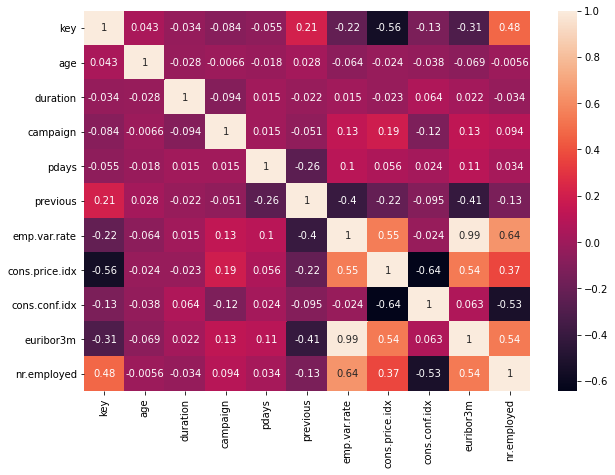

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(df_num.corr(),annot=True)

In [31]:
df[df['duration']<182]['y'].value_counts()

no    2358
Name: y, dtype: int64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


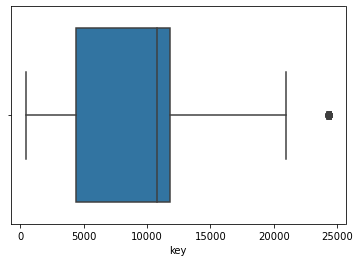

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


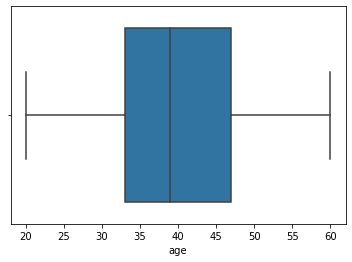

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


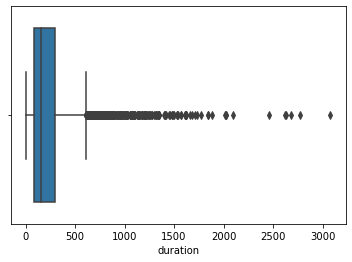

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


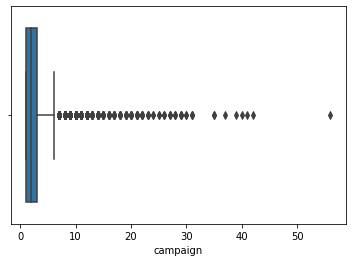

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


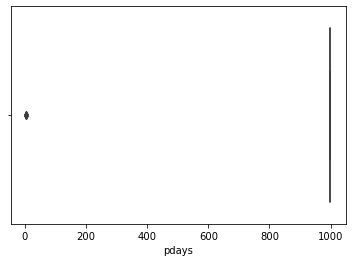

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


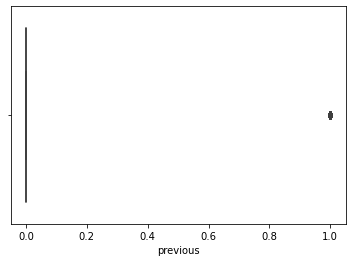

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


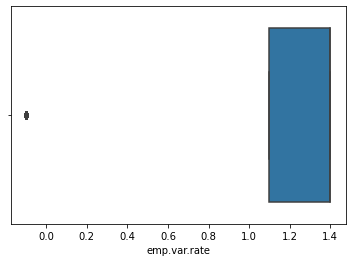

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


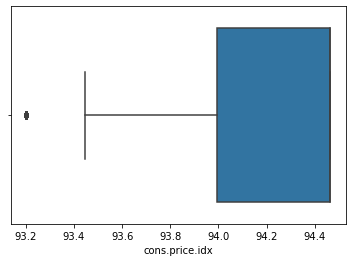

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


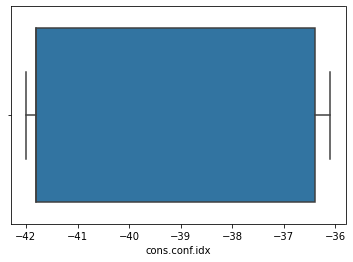

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


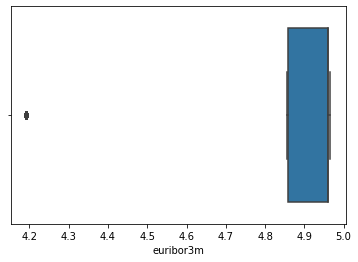

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


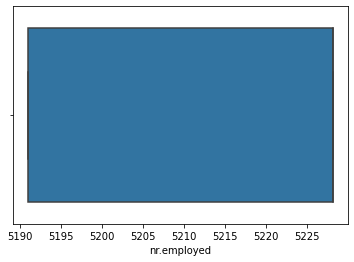

In [23]:
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.show()

In [32]:
y=df['y']
y=y.replace(['yes','no'],[1,0])

In [33]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4165    0
4166    0
4167    0
4168    0
4169    0
Name: y, Length: 4170, dtype: int64

In [ ]:
Encoding

In [55]:
df=pd.concat([df_cat,df_num],axis=1)
df.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y', 'key', 'age', 'duration',
       'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [56]:
y=df['y']
y=y.replace(['yes','no'],[1,0])
df.set_index(['key'],inplace=True)
X=df.drop(['y','default'],axis=1)

In [57]:
X=pd.get_dummies(X,drop_first=True)
X.shape

(4170, 39)

In [58]:
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

In [59]:
sc=StandardScaler()
X_train_sc=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_sc=pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [ ]:
SMOTE :  increase the number of observations in your Minority CLASs ( Yes)
      
        Synthetic Minority Oversampling Technique
        !pip install imblearn

In [61]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [62]:
smt = SMOTE(random_state = 2) 

In [63]:
X_train_smt, y_train_smt = smt.fit_resample(X_train_sc,y_train) 

In [64]:
X_train_smt.shape

(5586, 39)

In [65]:
X_train_sc.shape

(2919, 39)

In [66]:
y_train_smt.value_counts()

1    2793
0    2793
Name: y, dtype: int64

In [67]:
y_train.value_counts()

0    2793
1     126
Name: y, dtype: int64

In [91]:
# TRAINING ON SMOTE DATA
LR=LogisticRegression()
LR_model=LR.fit(X_train_smt,y_train_smt)
y_pred=LR_model.predict(X_train_smt)
accuracy_score(y_train_smt,y_pred)

0.9527389903329753

In [92]:
 # Prediction on Test Data using SMOTE TRAINED MODEL
y_pred=LR_model.predict(X_test_sc)
accuracy_score(y_test,y_pred)

0.9344524380495604

In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1192
           1       0.40      0.81      0.54        59

    accuracy                           0.93      1251
   macro avg       0.70      0.88      0.75      1251
weighted avg       0.96      0.93      0.94      1251



In [93]:
tn, fp, fn, tp=confusion_matrix(y_test,y_pred).ravel()
print("FP",fp)
print("FN",fn)

FP 71
FN 11


In [106]:
# Training on Original Data
LR=LogisticRegression()
LR_model=LR.fit(X_train_sc,y_train)
y_pred=LR_model.predict(X_train_sc)
accuracy_score(y_train,y_pred)

0.9664268585131894

In [107]:
#PREDICTION ON TEST DATA using ORIGINAL TRAINED DATA
y_pred=LR_model.predict(X_test_sc)
accuracy_score(y_test,y_pred)

0.9616306954436451

In [123]:
y_pred_proba=LR_model.predict_proba(X_train)
y_pred_proba

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [122]:
y_pred_proba=LR_model.predict_proba(X_test)
y_pred_proba

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [111]:
y_pred_proba=LR_model.predict_proba(X_test)
y_pred_proba[:,1]

array([1., 1., 1., ..., 1., 1., 1.])

In [1]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

NameError: name 'X' is not defined

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1192
           1       0.67      0.37      0.48        59

    accuracy                           0.96      1251
   macro avg       0.82      0.68      0.73      1251
weighted avg       0.96      0.96      0.96      1251



In [96]:
tn, fp, fn, tp=confusion_matrix(y_test,y_pred).ravel()
print("FP",fp)
print("FN",fn)

FP 11
FN 37


In [ ]:
# Build a function
# To pass your model, train it, check confusion Matrix, classification report and auc_roc_score

In [137]:
def build_model(model,X_train,y_train,X_test,y_test):
    model=model.fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    print("Results on Train Data \n")
    print("Accuracy Score on Train Data",accuracy_score(y_train,y_pred_train),"\n")
    print(classification_report(y_train,y_pred_train),"\n")
    y_pred_proba_train=model.predict_proba(X_train)
    print("Roc_Score",roc_auc_score(y_train,y_pred_proba_train[:,1]),"\n")
    print("\n Confusion Matrix \n",confusion_matrix(y_train,y_pred_train),"\n")
    
    print("Results on Test Data \n")
    y_pred_test=model.predict(X_test)
    print("Accuracy Score on Test Data",accuracy_score(y_test,y_pred_test),"\n")
    print(classification_report(y_test,y_pred_test),"\n")
    y_pred_proba_test=model.predict_proba(X_test)
    print("Roc_Score",roc_auc_score(y_test,y_pred_proba_test[:,1]),"\n")
    print("\n Confusion Matrix \n",confusion_matrix(y_test,y_pred_test),"\n")

In [129]:
DT=DecisionTreeClassifier()
build_model(DT,X_train_sc,y_train,X_test_sc,y_test)

Results on Train Data 

Accuracy Score on Test Data 1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2793
           1       1.00      1.00      1.00       126

    accuracy                           1.00      2919
   macro avg       1.00      1.00      1.00      2919
weighted avg       1.00      1.00      1.00      2919
 

Roc_Score 1.0 


 Confusion Matrix 
 [[2793    0]
 [   0  126]] 

Results on Test Data 

Accuracy Score on Test Data 0.9552358113509193 

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1192
           1       0.53      0.49      0.51        59

    accuracy                           0.96      1251
   macro avg       0.75      0.73      0.74      1251
weighted avg       0.95      0.96      0.95      1251
 

Roc_Score 0.7348566715959504 


 Confusion Matrix 
 [[1166   26]
 [  30   29]] 



In [133]:
DT=DecisionTreeClassifier()
build_model(DT,X_train_smt,y_train_smt,X_test_sc,y_test)

Results on Train Data 

Accuracy Score on Test Data 1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2793
           1       1.00      1.00      1.00      2793

    accuracy                           1.00      5586
   macro avg       1.00      1.00      1.00      5586
weighted avg       1.00      1.00      1.00      5586
 

Roc_Score 1.0 


 Confusion Matrix 
 [[2793    0]
 [   0 2793]] 

Results on Test Data 

Accuracy Score on Test Data 0.9488409272581935 

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1192
           1       0.47      0.66      0.55        59

    accuracy                           0.95      1251
   macro avg       0.73      0.81      0.76      1251
weighted avg       0.96      0.95      0.95      1251
 

Roc_Score 0.812052098737345 


 Confusion Matrix 
 [[1148   44]
 [  20   39]] 



In [134]:
RF=RandomForestClassifier()
build_model(RF,X_train_smt,y_train_smt,X_test_sc,y_test)

Results on Train Data 

Accuracy Score on Test Data 1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2793
           1       1.00      1.00      1.00      2793

    accuracy                           1.00      5586
   macro avg       1.00      1.00      1.00      5586
weighted avg       1.00      1.00      1.00      5586
 

Roc_Score 1.0 


 Confusion Matrix 
 [[2793    0]
 [   0 2793]] 

Results on Test Data 

Accuracy Score on Test Data 0.95603517186251 

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1192
           1       0.55      0.37      0.44        59

    accuracy                           0.96      1251
   macro avg       0.76      0.68      0.71      1251
weighted avg       0.95      0.96      0.95      1251
 

Roc_Score 0.9583878398361961 


 Confusion Matrix 
 [[1174   18]
 [  37   22]] 



In [135]:
RF=RandomForestClassifier()
build_model(RF,X_train_sc,y_train,X_test_sc,y_test)

Results on Train Data 

Accuracy Score on Test Data 1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2793
           1       1.00      1.00      1.00       126

    accuracy                           1.00      2919
   macro avg       1.00      1.00      1.00      2919
weighted avg       1.00      1.00      1.00      2919
 

Roc_Score 1.0 


 Confusion Matrix 
 [[2793    0]
 [   0  126]] 

Results on Test Data 

Accuracy Score on Test Data 0.95603517186251 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1192
           1       0.60      0.20      0.30        59

    accuracy                           0.96      1251
   macro avg       0.78      0.60      0.64      1251
weighted avg       0.94      0.96      0.95      1251
 

Roc_Score 0.9613809577977478 


 Confusion Matrix 
 [[1184    8]
 [  47   12]] 



In [138]:
ADA=AdaBoostClassifier()
build_model(ADA,X_train_sc,y_train,X_test_sc,y_test)

Results on Train Data 

Accuracy Score on Train Data 0.9705378554299418 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2793
           1       0.73      0.51      0.60       126

    accuracy                           0.97      2919
   macro avg       0.85      0.75      0.79      2919
weighted avg       0.97      0.97      0.97      2919
 

Roc_Score 0.9833640223006496 


 Confusion Matrix 
 [[2769   24]
 [  62   64]] 

Results on Test Data 

Accuracy Score on Test Data 0.9576338928856915 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1192
           1       0.58      0.37      0.45        59

    accuracy                           0.96      1251
   macro avg       0.77      0.68      0.72      1251
weighted avg       0.95      0.96      0.95      1251
 

Roc_Score 0.9316061881469685 


 Confusion Matrix 
 [[1176   16]
 [  37   22]] 



In [139]:
GDB=GradientBoostingClassifier()
build_model(GDB,X_train_sc,y_train,X_test_sc,y_test)

Results on Train Data 

Accuracy Score on Train Data 0.9856115107913669 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2793
           1       0.96      0.70      0.81       126

    accuracy                           0.99      2919
   macro avg       0.97      0.85      0.90      2919
weighted avg       0.99      0.99      0.98      2919
 

Roc_Score 0.9931447098471804 


 Confusion Matrix 
 [[2789    4]
 [  38   88]] 

Results on Test Data 

Accuracy Score on Test Data 0.9568345323741008 

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1192
           1       0.56      0.42      0.48        59

    accuracy                           0.96      1251
   macro avg       0.76      0.70      0.73      1251
weighted avg       0.95      0.96      0.95      1251
 

Roc_Score 0.9661585712660676 


 Confusion Matrix 
 [[1172   20]
 [  34   25]] 



In [ ]:
# gridsearchcv (Gradient boosting)

In [153]:
base_learners=[('RF',RandomForestClassifier()),('DT',DecisionTreeClassifier())]
stck=StackingClassifier(estimators=base_learners,final_estimator=GradientBoostingClassifier())

In [154]:
build_model(stck,X_train_sc,y_train,X_test_sc,y_test)

Results on Train Data 

Accuracy Score on Train Data 0.9688249400479616 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2793
           1       0.89      0.32      0.47       126

    accuracy                           0.97      2919
   macro avg       0.93      0.66      0.73      2919
weighted avg       0.97      0.97      0.96      2919
 

Roc_Score 0.9705073340948744 


 Confusion Matrix 
 [[2788    5]
 [  86   40]] 

Results on Test Data 

Accuracy Score on Test Data 0.9488409272581935 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1192
           1       0.41      0.19      0.26        59

    accuracy                           0.95      1251
   macro avg       0.68      0.59      0.61      1251
weighted avg       0.93      0.95      0.94      1251
 

Roc_Score 0.9414315777499717 


 Confusion Matrix 
 [[1176   16]
 [  48   11]] 



In [162]:
scores=cross_val_score(estimator=GradientBoostingClassifier(),X=X_train_sc,y=y_train,cv=10,scoring='roc_auc')

In [163]:
scores

array([0.91071429, 0.96904762, 0.97410714, 0.98979873, 0.90515578,
       0.97270471, 0.9127378 , 0.97187758, 0.94913151, 0.96863799])

In [164]:
np.var(scores)

0.0008755826399115315